In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('2018.csv', index_col = 0)

# Pre Processing
    In this notebook, I will detail some of the methods I performed for preparing the data set for training by ML algorithms.
    
    1. Handling missing values :
        There are examples in the data set that contain null values and entire columns that contain null values,
        so we would prefer to remove them.

In [3]:
num_of_samples = data.shape[0] ## 7,200,000
missing = pd.Series(data.isna().sum(), name = "amount").to_frame()
## search for columns that contain at least 70 percent null values from the dataset
missing_in_percentage = missing[(missing["amount"] / num_of_samples) > 0.7]
data.drop(missing_in_percentage.index.to_list() , inplace = True , axis = 1)

In [4]:
print(data.shape)
data = data.reset_index()
data.head(5)

(7213446, 20)


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,10.0,1745,1722.0,-23.0,0.0,0.0,268.0,250.0,225.0,1605.0
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,7.0,1254,1230.0,-24.0,0.0,0.0,99.0,83.0,65.0,414.0
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,5.0,1649,1636.0,-13.0,0.0,0.0,134.0,126.0,106.0,846.0
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,6.0,1756,1754.0,-2.0,0.0,0.0,190.0,182.0,157.0,1120.0
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,10.0,922,936.0,14.0,0.0,0.0,112.0,106.0,83.0,723.0


In [5]:
data = data.dropna()

    2. Features format change:
        2.1 IATA codes:
        Some features will be difficult to exploratory and analyze for example : dates and IATA codes
        that describe the airlines,origin,and destination airports.

In [6]:
airlines_codes = {'UA':'United Airlines', 'AS':'Alaska Airlines', '9E':'Endeavor Air', 'B6':'JetBlue Airways',
                  'EV':'ExpressJet', 'F9':'Frontier Airlines', 'G4':'Allegiant Air', 'HA':'Hawaiian Airlines',
                  'MQ':'Envoy Air', 'NK':'Spirit Airlines', 'OH':'PSA Airlines', 'OO':'SkyWest Airlines', 'VX':'Virgin America',
                  'WN':'Southwest Airlines', 'YV':'Mesa Airline', 'YX':'Republic Airways', 'AA':'American Airlines', 'DL':'Delta Airlines'}
data['OP_CARRIER'].replace(airlines_codes , inplace = True)
data = data.rename(columns = {'OP_CARRIER' : "Airline"})

In [7]:
airports_codes = pd.read_csv("airports.csv")
airports_dict = dict(zip(airports_codes.IATA_CODE, airports_codes.AIRPORT))
data['ORIGIN'].replace(airports_dict , inplace = True)
data = data[data['ORIGIN'].str.len() > 3]
data['DEST'].replace(airports_dict , inplace = True)
data = data[data['DEST'].str.len() > 3]

In [8]:
data.head(5)

,FL_DATE,Airline,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-01-01,United Airlines,2429,Newark Liberty International Airport,Denver International Airport,1517,1512.0,-5.0,15.0,1527.0,...,10.0,1745,1722.0,-23.0,0.0,0.0,268.0,250.0,225.0,1605.0
1,2018-01-01,United Airlines,2427,McCarran International Airport,San Francisco International Airport,1115,1107.0,-8.0,11.0,1118.0,...,7.0,1254,1230.0,-24.0,0.0,0.0,99.0,83.0,65.0,414.0
2,2018-01-01,United Airlines,2426,John Wayne Airport (Orange County Airport),Denver International Airport,1335,1330.0,-5.0,15.0,1345.0,...,5.0,1649,1636.0,-13.0,0.0,0.0,134.0,126.0,106.0,846.0
3,2018-01-01,United Airlines,2425,Southwest Florida International Airport,Chicago O'Hare International Airport,1546,1552.0,6.0,19.0,1611.0,...,6.0,1756,1754.0,-2.0,0.0,0.0,190.0,182.0,157.0,1120.0
4,2018-01-01,United Airlines,2424,Chicago O'Hare International Airport,Albany International Airport,630,650.0,20.0,13.0,703.0,...,10.0,922,936.0,14.0,0.0,0.0,112.0,106.0,83.0,723.0


        2.2 Dates:
        To more conveniently exploratory and analyze the information on the various flights,
        we will create two columns that will be the day and the month of the year.

In [9]:
days =  pd.DatetimeIndex(data['FL_DATE']).day
months = pd.DatetimeIndex(data['FL_DATE']).month

In [12]:
data.insert(0,"Day",days)
data.insert(1,"Month",months)
data.drop(['FL_DATE'] , inplace = True , axis = 1)

In [13]:
data.head(4)

,Day,Month,Airline,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,1,1,United Airlines,2429,Newark Liberty International Airport,Denver International Airport,1517,1512.0,-5.0,15.0,...,10.0,1745,1722.0,-23.0,0.0,0.0,268.0,250.0,225.0,1605.0
1,1,1,United Airlines,2427,McCarran International Airport,San Francisco International Airport,1115,1107.0,-8.0,11.0,...,7.0,1254,1230.0,-24.0,0.0,0.0,99.0,83.0,65.0,414.0
2,1,1,United Airlines,2426,John Wayne Airport (Orange County Airport),Denver International Airport,1335,1330.0,-5.0,15.0,...,5.0,1649,1636.0,-13.0,0.0,0.0,134.0,126.0,106.0,846.0
3,1,1,United Airlines,2425,Southwest Florida International Airport,Chicago O'Hare International Airport,1546,1552.0,6.0,19.0,...,6.0,1756,1754.0,-2.0,0.0,0.0,190.0,182.0,157.0,1120.0


    3. Feature Selection:
        Some of the features are not relevant for predicting flight delays such as :
            1. CANCELLED - which means that the flight has been canceled.
            2. OP_CARRIER_FL_NUM - which represent the flight number.
            3. DIVERTED - flight landed on different airport that the one scheduled

        I have defined a delayed flight to be a flight which does not take into account features that
        are expressed during the flight such as :
            1. TAXI_IN - The time duration elapsed between wheels-on and gate arrival at the destination airport.
            2. TAXI_OUT - The time duration elapsed between departure from the origin airport gate and wheels off.
            3. WHEELS_OFF  - The time point that the aircraft's wheels leave the ground
            4. WHEELS_ON - The time point that the aircraft'ss wheels touch on the ground.

In [14]:
feature_selection = ['CANCELLED' , 'OP_CARRIER_FL_NUM','DIVERTED','TAXI_IN','TAXI_OUT','WHEELS_OFF','WHEELS_ON']
data.drop(feature_selection , inplace = True , axis = 1)

In [15]:
rename_dict = {'ORIGIN' : 'Origin','DEST': 'Destination','CRS_DEP_TIME' : 'Scheduled Departure', 'DEP_TIME' : 'Departure Time',
               'DEP_DELAY' : 'Departure Delay','CRS_ARR_TIME':'Scheduled Arrival','ARR_TIME':'Arrival Time','ARR_DELAY':'Arrival Delay',
               'CRS_ELAPSED_TIME':'Planned Time','ACTUAL_ELAPSED_TIME':'Actual Time','AIR_TIME':'Air Time','DISTANCE':'Distance'}
data = data.rename(columns = rename_dict)

    Since the data set is very large (7 million records) I will only refer to Virgin America Airline, 
    And model the problem based on those flights data.

In [16]:
final_data = data[data['Airline'] == 'Virgin America']
final_data.shape

(17153, 15)

    4. Feature Engineering:
        Binary Classification:
        In order to prepare the data set for learning, I will create the labeling column describing a binary classification.
        A flight that is late will be labled with 1 and a flight that arrived on time will be labled with 0.
    

In [17]:
status = []
for value in final_data['Arrival Delay']:
    if value <= 0:
        status.append(0)
    else:
        status.append(1)
        
final_data.insert(15,"Status",status)

In [18]:
final_data['Status'].value_counts(normalize = True)
delayed = final_data[final_data['Status'] == 1].shape
nondelayed = final_data[final_data['Status'] == 0].shape
print(f' delayed flights : {delayed} non delayed flights {nondelayed}')

 delayed flights : (6338, 16) non delayed flights (10815, 16)


        As you can see  we have highly imbalanced data, as we there are only 37% rows with the value of 1.0 (Delay in flight).
        We will drop a significant amount of rows where our target variable is 0 (No delay in flight).

### UnderSampeling
        A common way of dealing with this issue is undersampling, which means remove observations from the majority class
        such that the dataset will have an equal number of observations for each class.

In [19]:
nmin = final_data['Status'].value_counts().min()
final_data = final_data.groupby('Status').apply(lambda x: x.sample(nmin)).reset_index(drop = True)
final_data.sample(frac = 1).reset_index(drop = True)
final_data['Status'].value_counts()

0    6338
1    6338
Name: Status, dtype: int64

In [20]:
print(f' The shape of the new dataset : {final_data.shape}')
final_data.head(5)

 The shape of the new dataset : (12676, 16)


,Day,Month,Airline,Origin,Destination,Scheduled Departure,Departure Time,Departure Delay,Scheduled Arrival,Arrival Time,Arrival Delay,Planned Time,Actual Time,Air Time,Distance,Status
0,27,2,Virgin America,San Francisco International Airport,McCarran International Airport,1205,1151.0,-14.0,1336,1325.0,-11.0,91.0,94.0,72.0,414.0,0
1,18,2,Virgin America,McCarran International Airport,San Francisco International Airport,730,719.0,-11.0,910,855.0,-15.0,100.0,96.0,71.0,414.0,0
2,3,1,Virgin America,Gen. Edward Lawrence Logan International Airport,Los Angeles International Airport,900,906.0,6.0,1254,1240.0,-14.0,414.0,394.0,354.0,2611.0,0
3,1,3,Virgin America,San Francisco International Airport,Los Angeles International Airport,900,853.0,-7.0,1031,1030.0,-1.0,91.0,97.0,54.0,337.0,0
4,7,3,Virgin America,San Francisco International Airport,Indianapolis International Airport,810,800.0,-10.0,1520,1507.0,-13.0,250.0,247.0,214.0,1943.0,0


    5. Searching for Multi-Collinearity :
       Multicollinearity is a situation in which linear relationships between the explanatory variables in the sample interfere
       with the estimation of regression.



<AxesSubplot:>

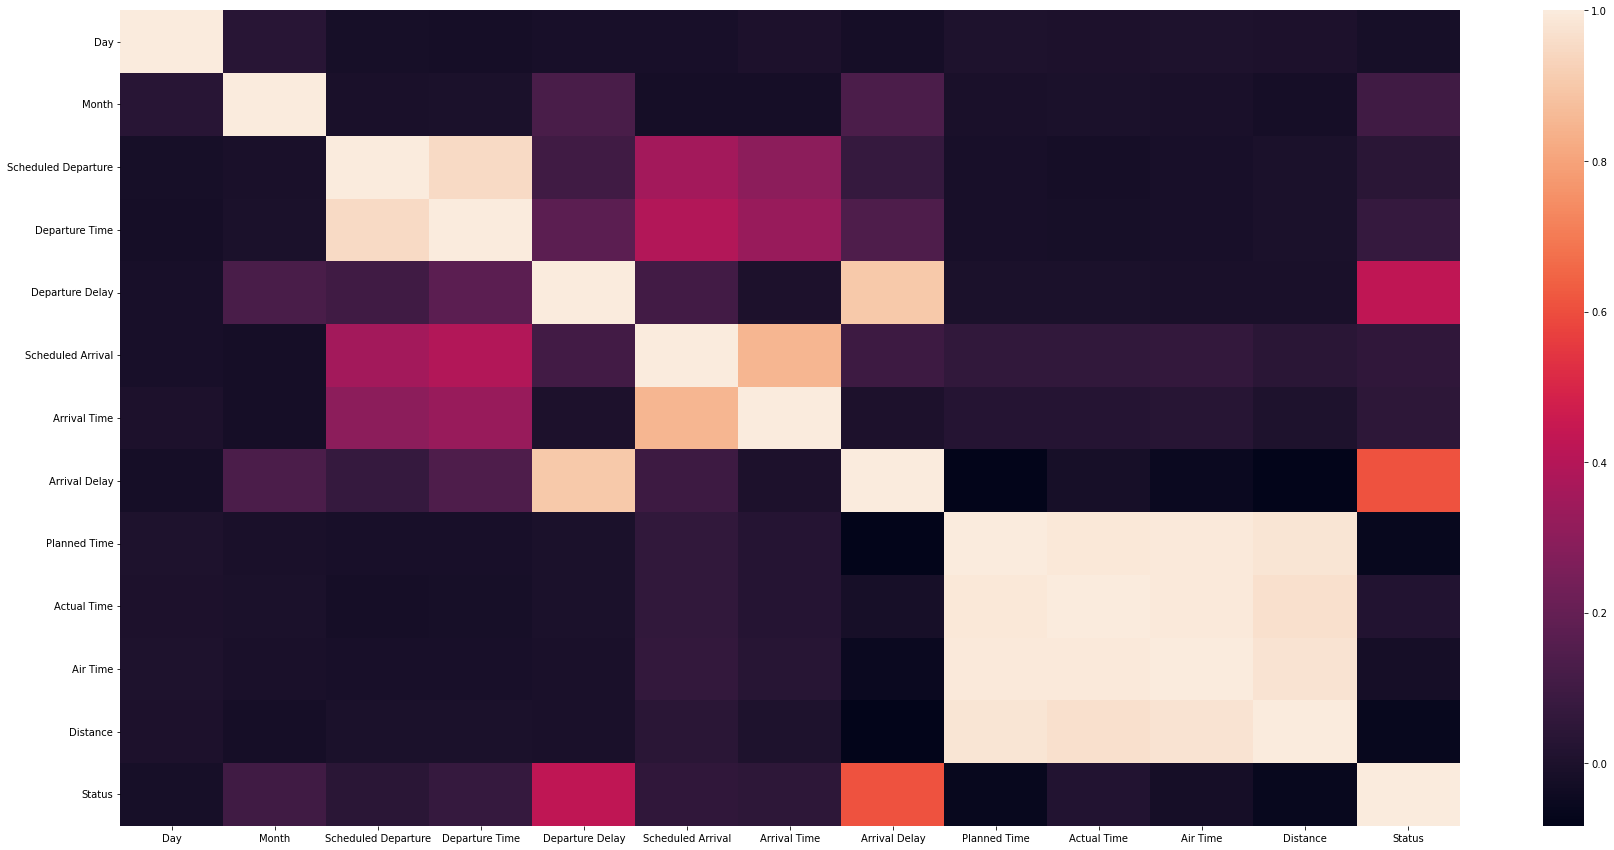

In [21]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 30,15
sns.heatmap(final_data.corr())

    As can be seen, there is a high correlation between the explanatory variables: Planned Time, and Air Time.
    Therefore, to meet the regression assumptions we will remove these variables from the data set.
    For the EDA part , i will not remove the explanatory variable : Arrival Time , i will remove him before modeling.

In [22]:
final_data.drop(["Planned Time","Air Time"] , inplace = True ,axis = 1)

In [23]:
final_data.to_csv("dataset.csv" , index = False)

In [24]:
final_data.shape

(12676, 14)